In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge
import sklearn.metrics as mt
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv(r"C:\Users\Kemalettin\Desktop\anlasekon\Python ile Makine Öğrenmesi\Advertising.csv",index_col=0)
data2 = data.copy()
data2.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [16]:
y = data2["Sales"]
X = data2.drop(columns="Sales",axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [18]:
lr = LinearRegression()
lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)
r2 = mt.r2_score(y_test,y_pred)
mse = mt.mean_squared_error(y_test,y_pred)

print(f"R2 skoru: {r2}\nMSE skoru: {mse}")

R2 skoru: 0.899438024100912
MSE skoru: 3.1740973539761033


In [19]:
# buraya kadar yaptıklarımız artık genel ridgeyi görelim lambdanın etkisini görelim
rid_model = Ridge(alpha=0.5)
rid_model.fit(X_train,y_train)
rid_pred = rid_model.predict(X_test)

r2rid = mt.r2_score(y_test,y_pred)
mserid = mt.mean_squared_error(y_test,y_pred)

print(f"R2 Rid skoru: {r2rid}\nMSE Rid skoru: {mserid}")
# çıktıya bakınca çok yüksek bir fark yokmuş gibi gelebilir bunun nedeni burada çoklu doğrusallıkla
# ilgili bir problem yokmuş olsaydı baya etki edecekti bu etkiyi görmek için görmek için
# hiper parametre olan lambda burada alpha olarak geçen değeri yükseltelim

R2 Rid skoru: 0.899438024100912
MSE Rid skoru: 3.1740973539761033


In [17]:
rid_model2 = Ridge(alpha=1000)
rid_model2.fit(X_train,y_train)
rid_pred2 = rid_model2.predict(X_test)

r2rid2 = mt.r2_score(y_test,y_pred)
mserid2 = mt.mean_squared_error(y_test,y_pred)

print(f"R2 Rid skoru: {r2rid2}\nMSE Rid skoru: {mserid2}") # mesela 3.random stateyi dğeiştirdim tabi
# o nasıl denk geldiyse en iyi haliydi sanırım :D görüldüğü gibi çok fena bozuldu 
# anomali ortaya çıktı 

R2 Rid skoru: -0.4426487248572133
MSE Rid skoru: 45.5351782753486


[5.00000000e+09 3.78231664e+09 2.86118383e+09 2.16438064e+09
 1.63727458e+09 1.23853818e+09 9.36908711e+08 7.08737081e+08
 5.36133611e+08 4.05565415e+08 3.06795364e+08 2.32079442e+08
 1.75559587e+08 1.32804389e+08 1.00461650e+08 7.59955541e+07
 5.74878498e+07 4.34874501e+07 3.28966612e+07 2.48851178e+07
 1.88246790e+07 1.42401793e+07 1.07721735e+07 8.14875417e+06
 6.16423370e+06 4.66301673e+06 3.52740116e+06 2.66834962e+06
 2.01850863e+06 1.52692775e+06 1.15506485e+06 8.73764200e+05
 6.60970574e+05 5.00000000e+05 3.78231664e+05 2.86118383e+05
 2.16438064e+05 1.63727458e+05 1.23853818e+05 9.36908711e+04
 7.08737081e+04 5.36133611e+04 4.05565415e+04 3.06795364e+04
 2.32079442e+04 1.75559587e+04 1.32804389e+04 1.00461650e+04
 7.59955541e+03 5.74878498e+03 4.34874501e+03 3.28966612e+03
 2.48851178e+03 1.88246790e+03 1.42401793e+03 1.07721735e+03
 8.14875417e+02 6.16423370e+02 4.66301673e+02 3.52740116e+02
 2.66834962e+02 2.01850863e+02 1.52692775e+02 1.15506485e+02
 8.73764200e+01 6.609705

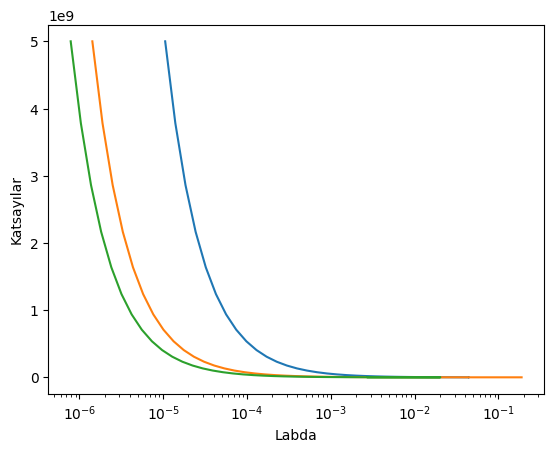

In [35]:
# daha önce dediğimiz gibi iteratif yani yinelemeli yani döngü ile en optimalini bulmaya çalışalım
katsayılar = []
lambdalar = 10**np.linspace(10,-2,100)*0.5
print(lambdalar)
for i in lambdalar:
    ridmodel = Ridge(alpha=i)
    ridmodel.fit(X_train,y_train)
    katsayılar.append(ridmodel.coef_)

ax=plt.gca()
ax.plot(katsayılar,lambdalar)
ax.set_xscale("log")
plt.xlabel("Labda")
plt.ylabel("Katsayılar")
plt.show()
# Çıktıda görüldüğü üzere lamda yani alfa değeri büyüdükçe katsayılar oldukça küçüldü
# eksili sayılardan başlayan lambdaları yavaş yavaş artıya doğru götürdükçe katsayılar 
# da oldukça küçülmüş oldu